In [1]:
import numpy as np
import pyatomdb
import scipy
import xrayflux
from xrayflux.xraytables import compute_flux, make_fluxtable

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## DEMO XRAYFLUX
#### 1. Compute a flux

In [7]:
# Define the energy range, the temperature, the redshift.
T = 5 #in keV
z = 0.

# compute a flux for a given redshift, Temperature.
flux = compute_flux(T=T, z=z)
print(flux, r"ph cm^3 s^-1")
# The result has then to be multiplied by ne * np * Volume / distance * collecting_area
# Only H and He are considered by default, with Z(H) = 1 Zsolar and Z(He) = 0.3 Zsolar.
# By default, eebrems is off.
# The default energy band is 0.5 - 2 keV

2.672476983729378e-15 ph cm^3 s^-1


#### 2. Compute a flux table

100%|█████████████████████████████████████████████| 2500/2500 [00:06<00:00, 405.67it/s]


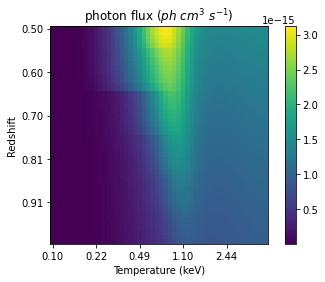

In [3]:
# define the present elements, elemental abundancies, and starting indexe.
abund = 0.3
idx_start_abund = 1      # this means that all elements from atomic number 1 are concerned by abund
elements = [1, 2, 6, 26] # include carbon and iron for instance

# If metals are included, the energy binning should be refined to resolve emission lines
res, zbins, Tbins, elements, abres = make_fluxtable(outfile=None,
             range_E=[0.5, 2.0], n_E=200, 
             range_T=[0.1, 5.], n_T=50, 
             range_z=[0.5, 1.], n_z=50, 
             abund=0.3, idx_start_abund=1,
             elements=elements)
xticks(ticks=range(0,Tbins.size,10),labels=['%.2f'%T for T in Tbins[::10]])
yticks(ticks=range(0,zbins.size,10),labels=['%.2f'%z for z in zbins[::10]])
ylabel('Redshift')
xlabel('Temperature (keV)')
title(r'photon flux $(ph\ cm^{3}\ s^{-1})$')
imshow(res)
colorbar()
# At energies ~1keV, emission lines from metals boost the integrated flux. 
# Without a RMF in input, the redshifting of metal lines induce jumps in the output flux.

100%|█████████████████████████████████████████████| 2500/2500 [00:13<00:00, 182.71it/s]


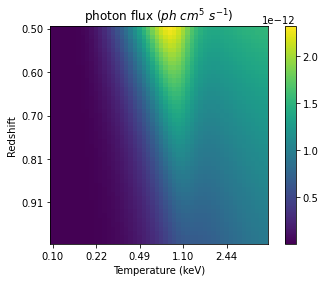

In [4]:
# Now add RMF and ARF files
res, zbins, Tbins, elements, abres = xrayflux.xraytables.make_fluxtable(outfile=None,
             range_E=[0.5, 2.0], n_E=200, 
             range_T=[0.1, 5.], n_T=50, 
             range_z=[0.5, 1.], n_z=50, 
             abund=0.3, idx_start_abund=1,
             elements=elements,
             arf='pn-thin-5-ao20.arf',
             rmf='pn-thin-5-ao20.rmf')
xticks(ticks=range(0,Tbins.size,10),labels=['%.2f'%T for T in Tbins[::10]])
yticks(ticks=range(0,zbins.size,10),labels=['%.2f'%z for z in zbins[::10]])
ylabel('Redshift')
xlabel('Temperature (keV)')
title(r'photon flux $(ph\ cm^{5}\ s^{-1})$')
imshow(res)
colorbar()

100%|██████████████████████████████████████████████████| 15/15 [00:00<00:00, 33.90it/s]


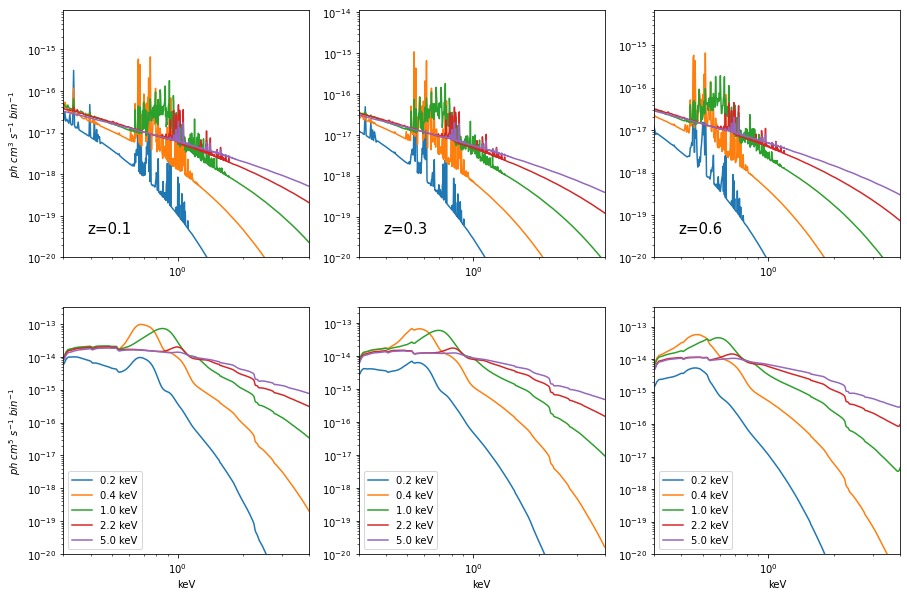

In [5]:
# set plots to True to visualise the spectra. In that case, reduce n_T and n_z.
res, zbins, Tbins, elements, abres = xrayflux.xraytables.make_fluxtable(outfile=None,
             range_E=[0.3, 4.0], n_E=600, 
             range_T=[0.2, 5.], n_T=5, 
             range_z=[0.1, .6], n_z=3, 
             abund=.3, idx_start_abund=1,
             elements=elements,
             arf='pn-thin-5-ao20.arf',
             rmf='pn-thin-5-ao20.rmf',
             plots=True)